# [OpenAI](https://openai.com/)
- OpenAI는 인공지능 기술을 연구하고 세상에 공개하는 회사입니다. 
- 우리가 쓰는 ChatGPT, 이미지 만드는 DALL·E 같은 것도 OpenAI가 만든 LLM 모델들입니다.

## ChatGPT vs OpenAI API

### ChatGPT
- 정의: 웹/앱에서 바로 사용하는 대화형 AI 서비스
- 대상: 일반 사용자
- 사용 방법: 웹사이트(chat.openai.com) 또는 모바일 앱 접속
- 비용: 
    - 무료 플랜: GPT-3.5 모델, 제한적 사용
    - Plus ($20/월): GPT-4 사용, 우선 접속, 더 많은 기능
    - Pro ($200/월): 무제한 사용, 최신 모델

### OpenAI API
- 정의: 개발자가 자신의 프로그램에 AI 기능을 추가할 수 있는 도구
- 대상: 개발자, 기업
- 사용 방법: 프로그래밍 코드로 연동
- 비용:
    - 종량제: 사용한 만큼만 지불
    - 토큰 기반: 입력/출력 텍스트 양에 따라 과금

### 주요 차이점

| 구분 | ChatGPT | OpenAI API |
|------|---------|------------|
| **사용 목적** | 직접 대화하기 | 내 서비스에 AI 통합 |
| **접근 방법** | 웹/앱 UI | 프로그래밍 코드 |
| **기술 지식** | 불필요 | 프로그래밍 필요 |
| **요금제** | 월 정액제 ($20/월) | 사용량 기반 과금 |
| **커스터마이징** | 제한적 | 자유로운 커스터마이징 |

## [OpenAI 가입/로그인](https://platform.openai.com/docs/overview)

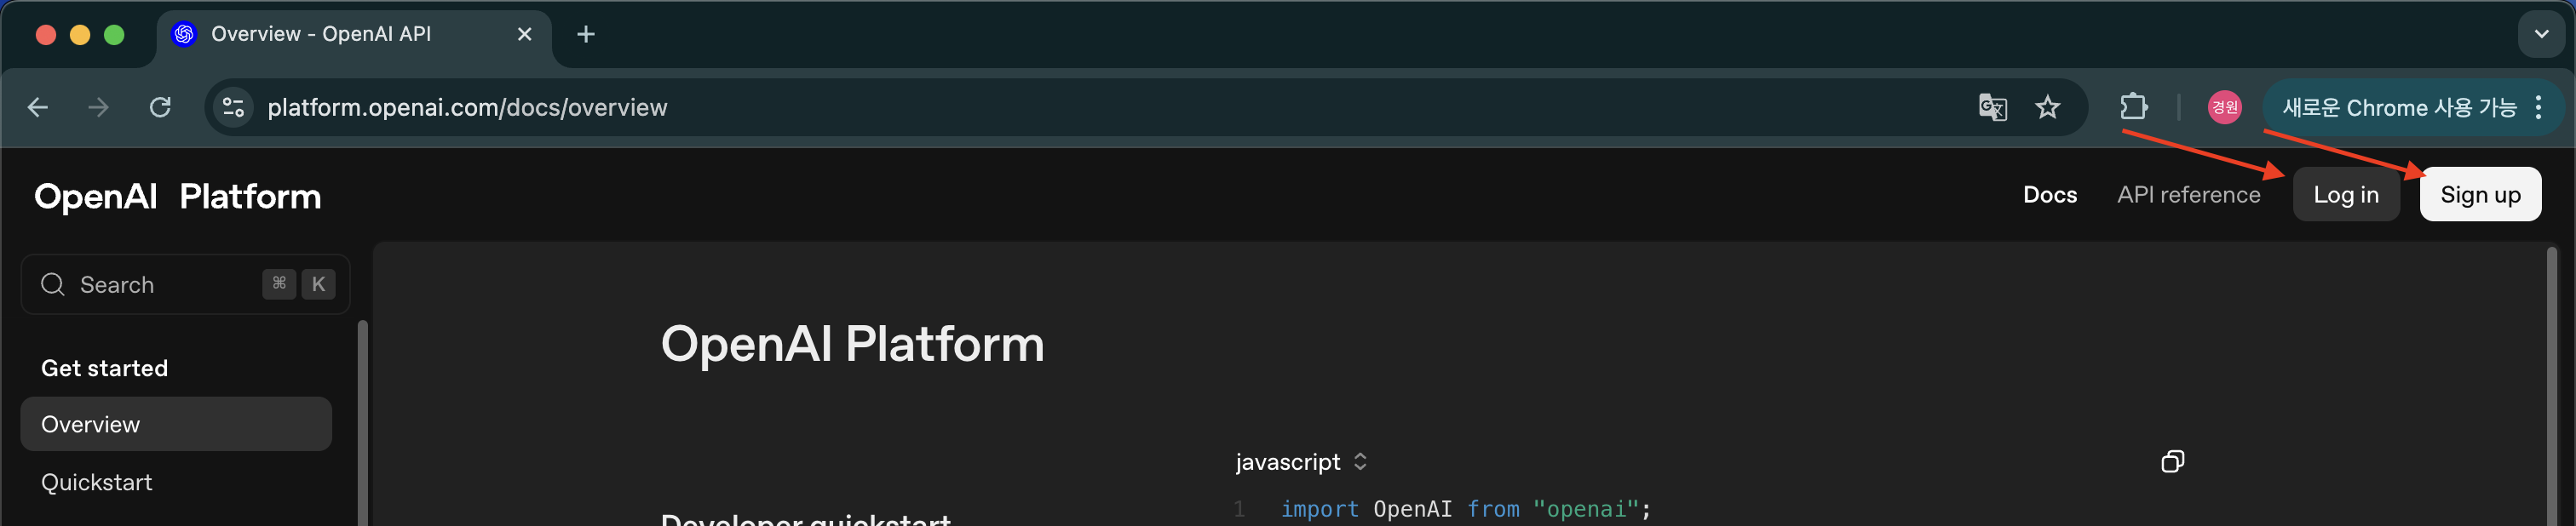

## [OpenAI 결제](https://platform.openai.com/settings/organization/billing/overview)

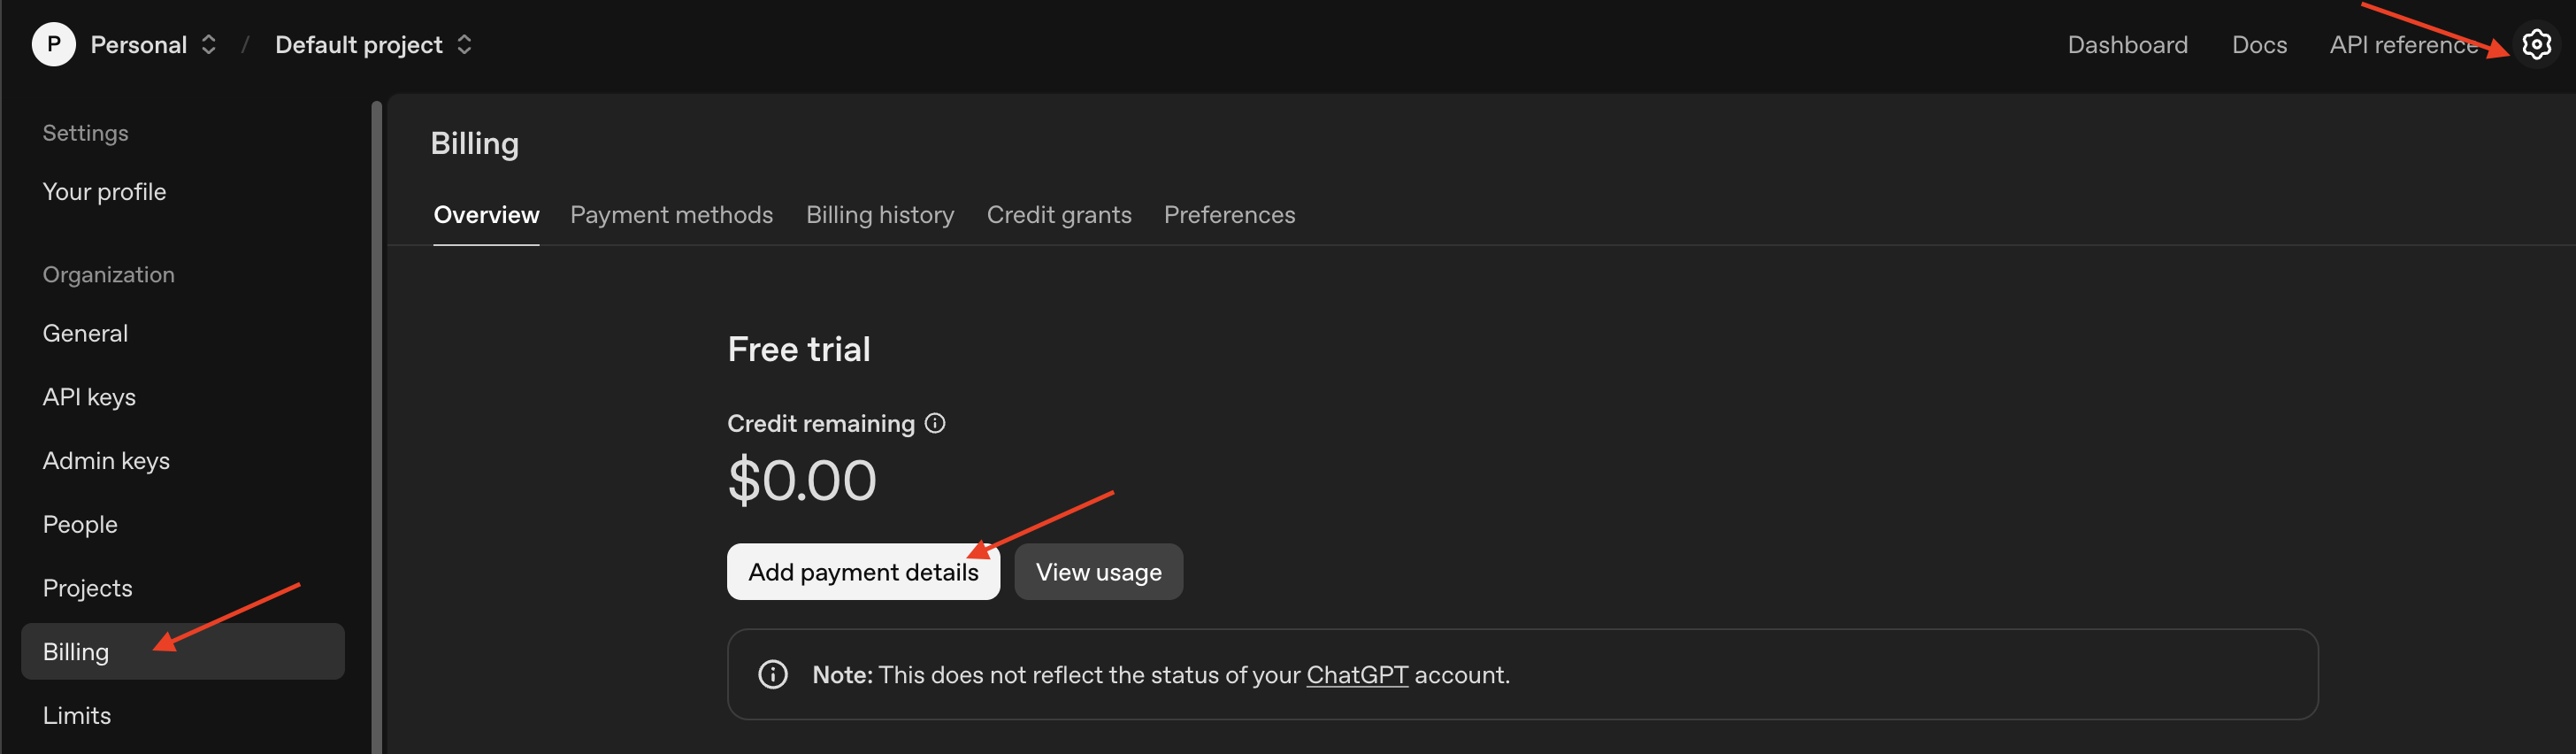

## [OpenAI API Key 발급](https://platform.openai.com/api-keys)
- ChatGPT나 GPT-4, GPT-5 같은 모델은 내 컴퓨터에 설치되는 게 아니라, OpenAI가 운영하는 클라우드 서버에서 실행됩니다.
- 따라서 API Key를 통해서 인증(Authorization)의 역할을 한다.

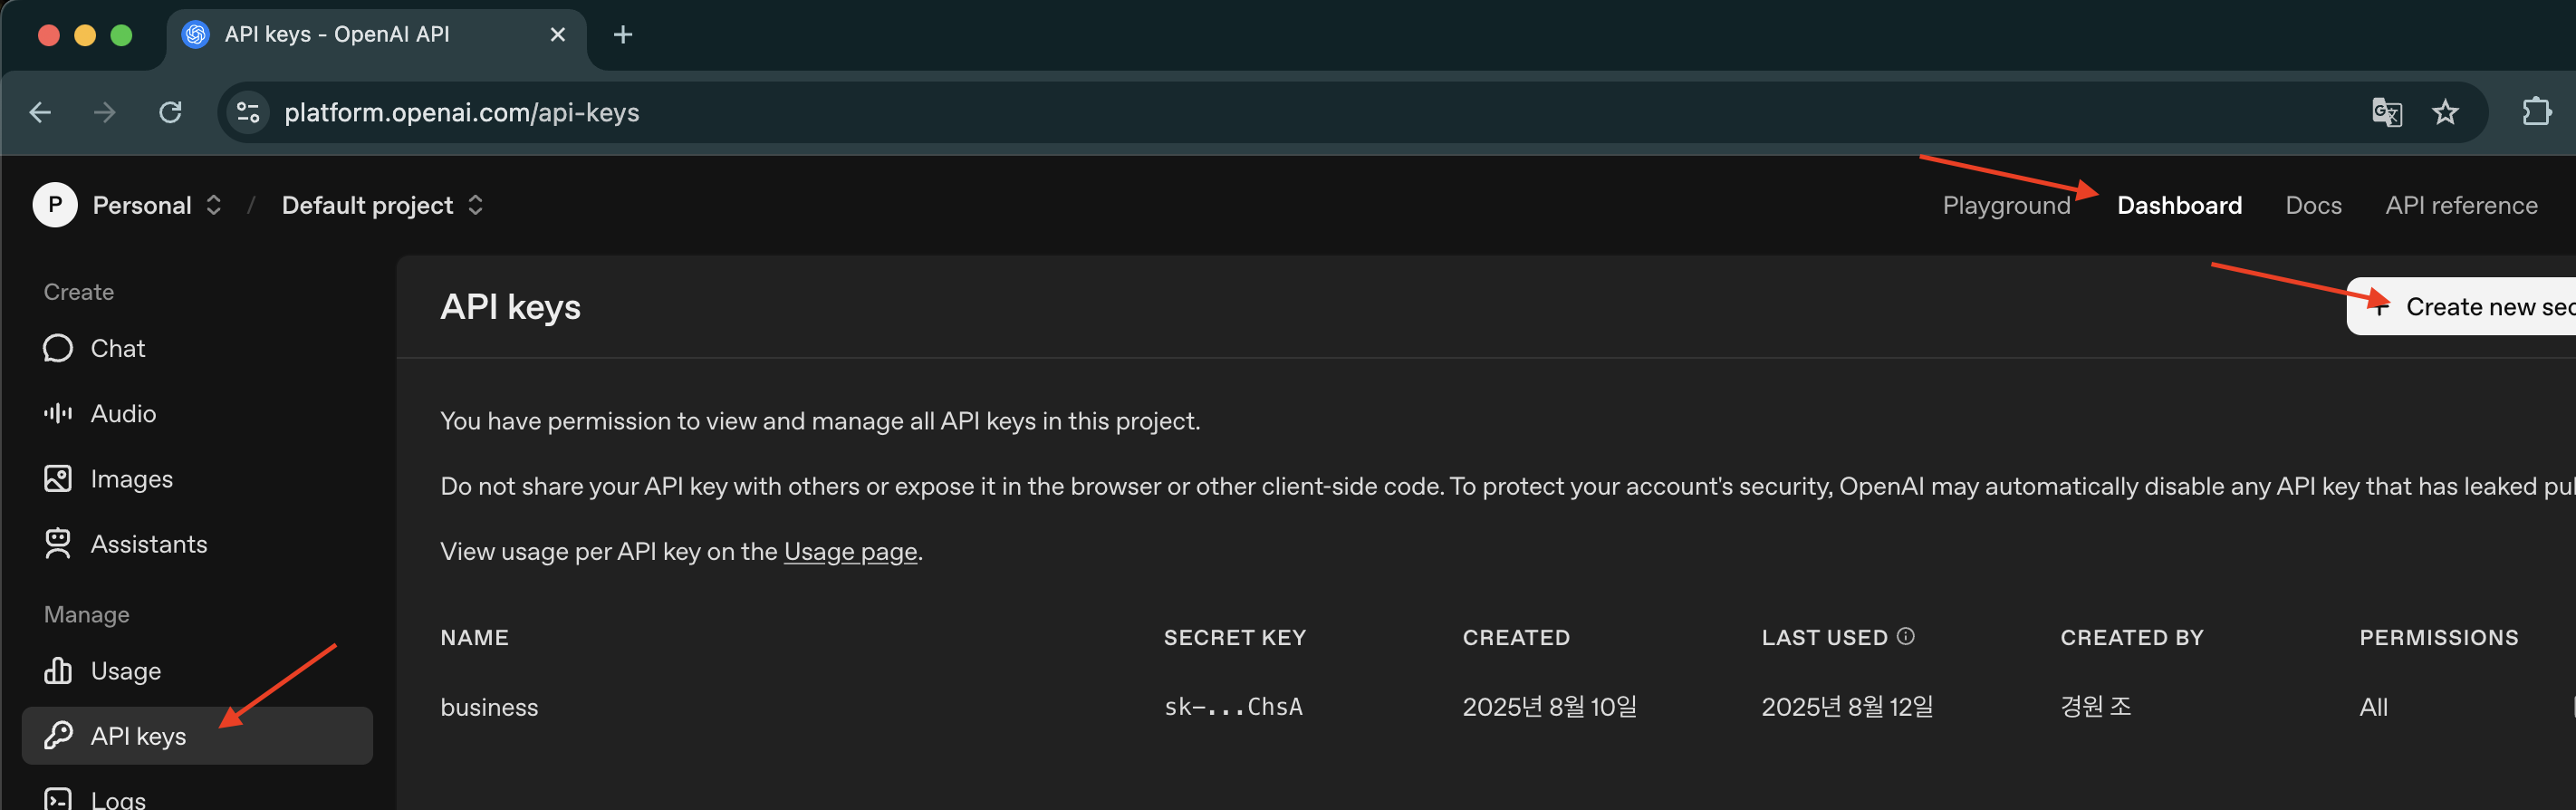

In [1]:
import os 

# 직접 적용 방법
# os.environ["OPENAI_API_KEY"] = "sk-your_api_key_here"

In [2]:
from dotenv import load_dotenv

# dotenv 파일에서 환경변수 로드
load_dotenv()

True

In [3]:
# API 키 확인
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    print("OpenAI API 키가 설정되었습니다. (GPT 모델 사용)")
else:
    print("OpenAI API 키가 없습니다.")

OpenAI API 키가 설정되었습니다. (GPT 모델 사용)


## [OpenAI(ChatGPT) Model](https://platform.openai.com/docs/models)

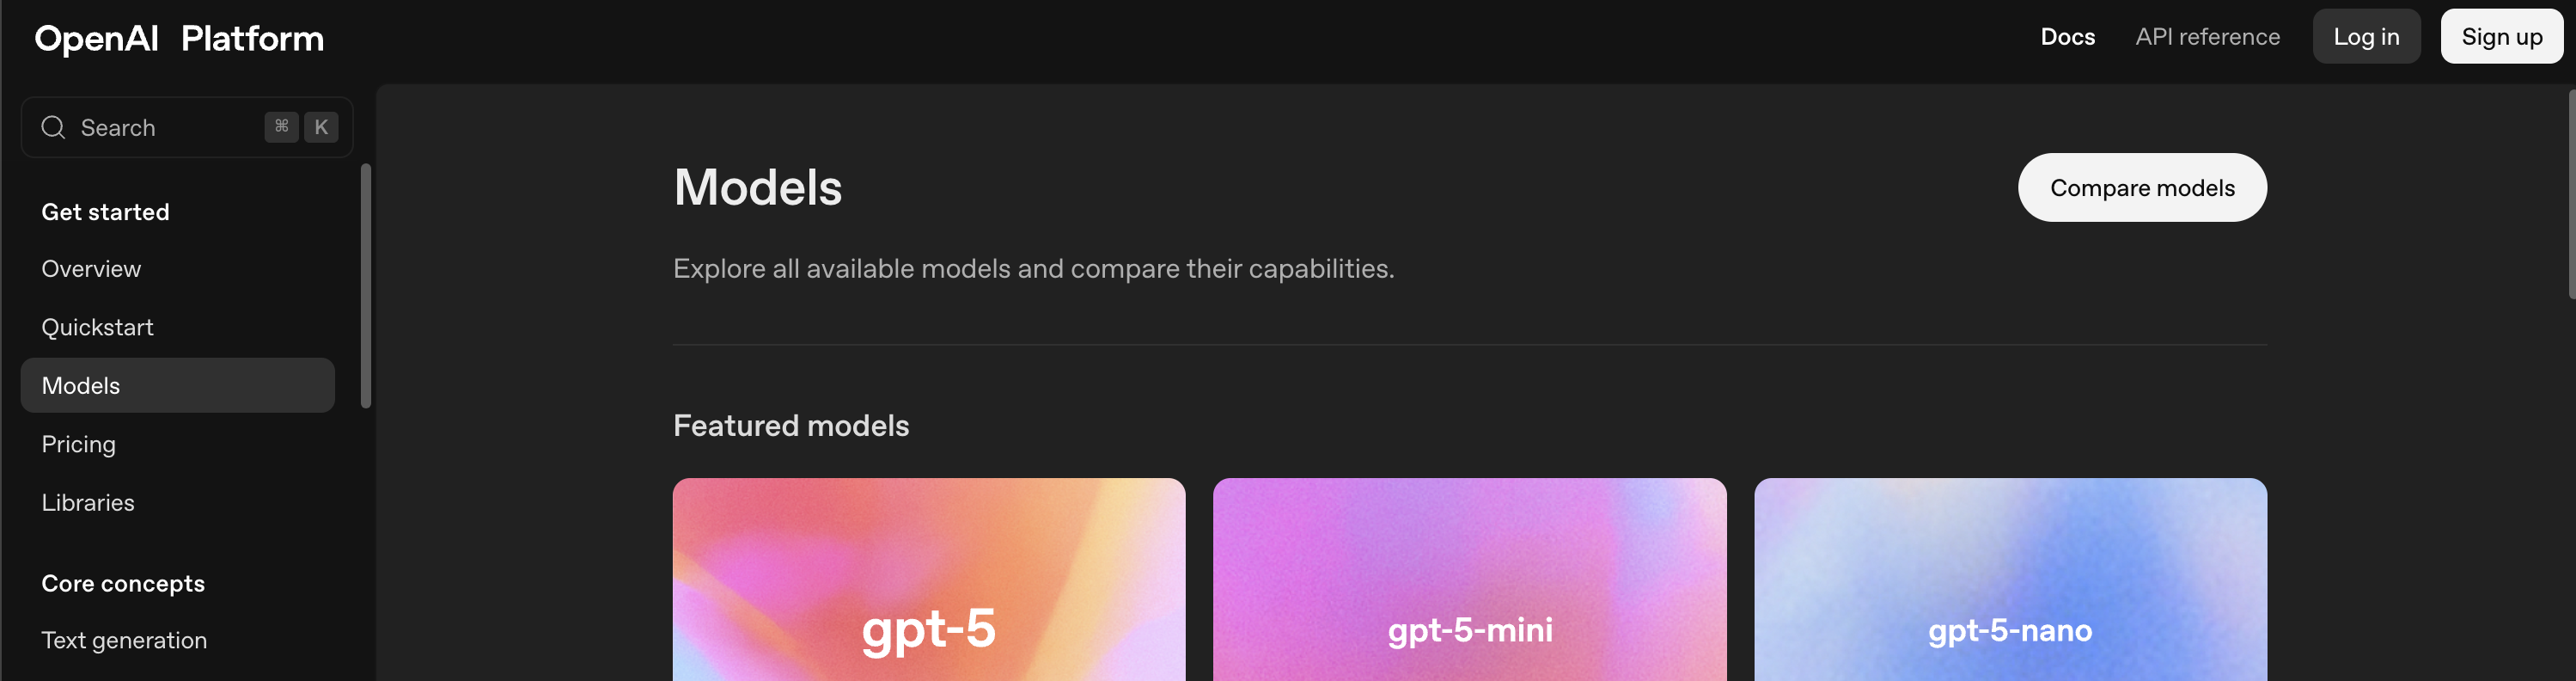

### [모델별 금액](https://platform.openai.com/docs/pricing) 

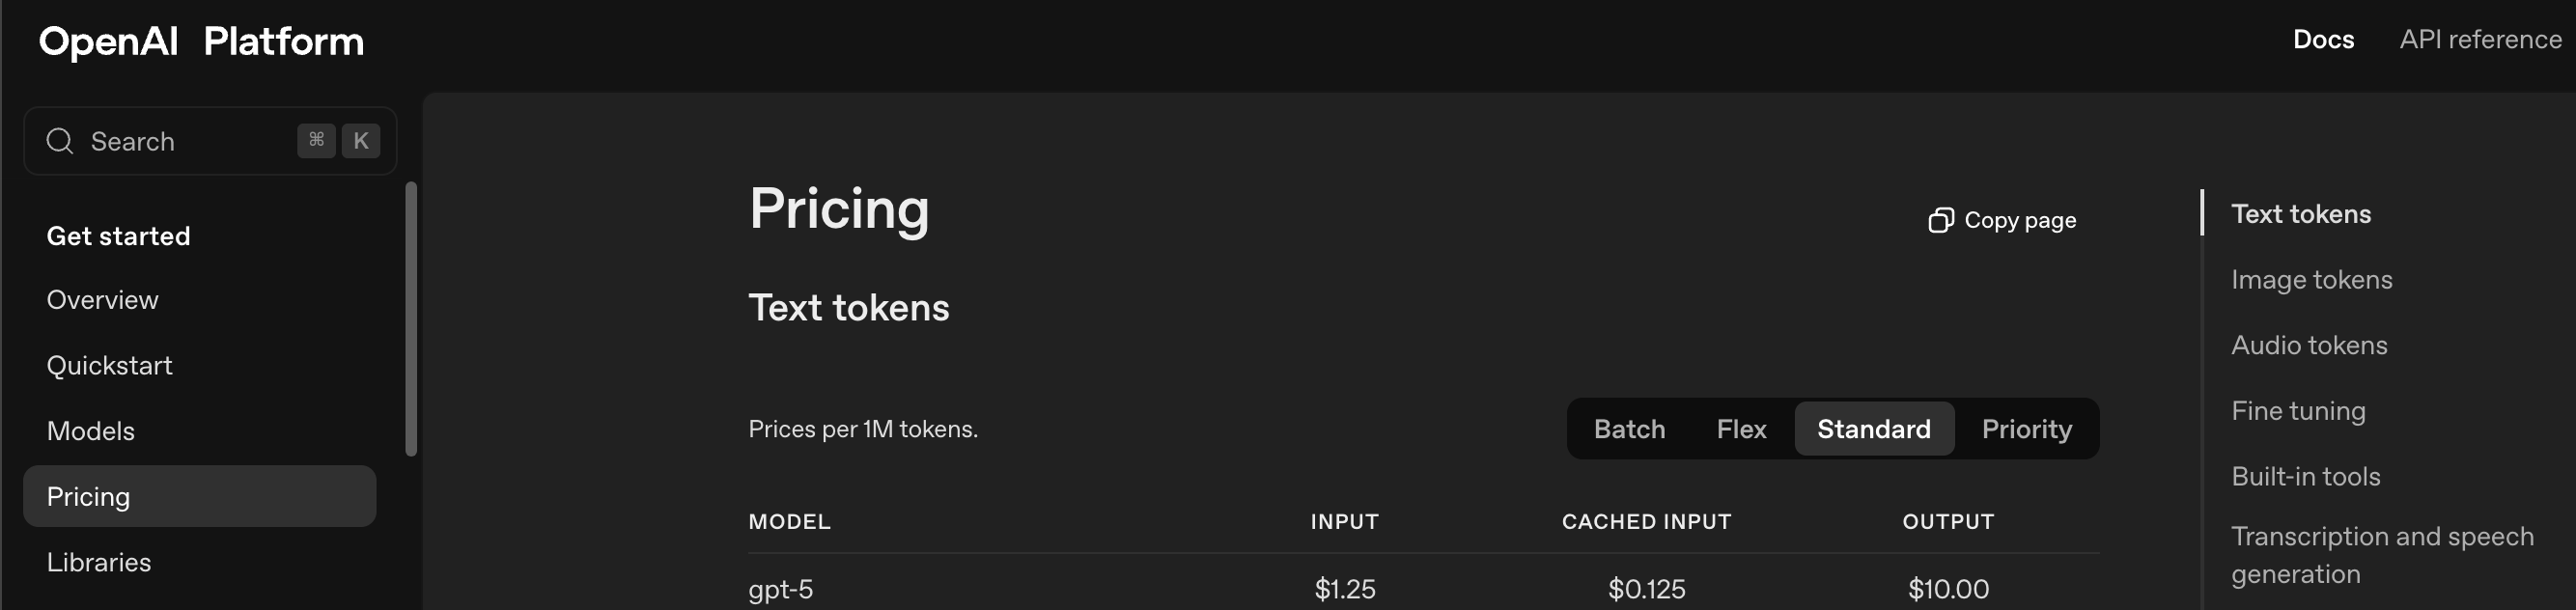

### [GPT-5 이전 모델의 주요 파라미터](https://platform.openai.com/docs/api-reference/responses/create)

| 파라미터                  | 타입 / 범위                             | 기본값 (또는 일반값)                      | 역할 / 의미                        | 활용 팁 / 주의사항                                                      |
| --------------------- | ----------------------------------- | --------------------------------- | ------------------------------ | ---------------------------------------------------------------- |
| **model**             | 문자열                                 | 예: `"gpt-3.5-turbo"`, `"gpt-4"` 등 | 사용할 모델을 지정                     | 각 모델마다 최대 입력 길이(context window)나 지원 파라미터가 다름                     |
| **messages**          | 배열 (list of dict)                   | —                                 | 대화 내역 또는 프롬프트 메시지들             | 보통 `role: "system"`, `"user"`, `"assistant"` 형태로 구성              |
| **temperature**       | float, 보통 0.0 ~ 1.0 (혹은 조금 더 높게 허용) | 1.0 (또는 0.7 등)                    | 생성 결과의 무작위성 정도 조절              | 값이 낮으면 더 결정적이고 안정적인 답, 값이 높으면 다양하고 창의적인 답                        |
| **top_p**             | float, 0.0 ~ 1.0                    | 1.0                               | 누적 확률 컷오프 (nucleus sampling)   | `top_p`를 낮추면 가능한 단어 후보를 좁힘; `temperature`와 함께 쓰이기도 함             |
| **max_tokens**        | integer                             | 모델별로 다름                           | **최대 출력 토큰 수** 제한              | 입력 + 출력의 토큰 합은 모델의 최대 context 수를 넘을 수 없음 ([OpenAI Community][1]) |
| **n**                 | integer                             | 1                                 | 한 번의 요청으로 생성할 응답 개수            | 여러 개의 후보를 보고 가장 좋은 걸 선택하는 경우 등에 사용                               |
| **stop**              | 문자열 또는 문자열 배열                       | —                                 | 출력이 특정 문자열을 만나면 생성을 중단         | 예: `["\n\n", "END"]` 등                                           |
| **presence_penalty**  | float (음수 ~ 양수)                     | 0.0                               | 이미 등장한 단어나 주제를 또 사용할 확률 감소 조절  | 값이 클수록 새로운 단어나 주제로 넘어갈 가능성이 커짐                                   |
| **frequency_penalty** | float                               | 0.0                               | 반복 단어의 사용 빈도에 따른 패널티 조절        | 같은 단어가 반복되는 것을 줄이고 싶을 때 사용                                       |
| **logit_bias**        | 객체/맵                                | —                                 | 특정 토큰의 사전 확률을 조정 가능            | 예: 특정 단어가 나올 확률을 높이거나 낮추고 싶을 때                                   |
| **user**              | 문자열                                 | —                                 | 요청을 보낸 사용자의 식별자 (로깅 / 모니터링 목적) | 보안이나 요금 관리 목적                                                    |
| **stream**            | Boolean                             | false                             | 스트리밍 방식으로 응답을 받을지 여부           | `true`이면 중간 중간 토큰 단위로 응답을 받음                                     |

[1]: https://community.openai.com/t/max-tokens-chat-completion-gpt4o/758066?utm_source=chatgpt.com "Max tokens chat completion gpt4o - OpenAI Developer Community"


### [GPT-5 계열 주요 파라미터](https://platform.openai.com/docs/guides/latest-model)

| 파라미터 이름                                            | 허용 값 / 타입                                  | 역할 / 의미                                     | 비고 / 제한 사항                                                                                                       |
| -------------------------------------------------- | ------------------------------------------ | ------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **verbosity**                                      | `"low"`, `"medium"`, `"high"`              | 응답의 길이나 서술 수준 조절 (간결 ↔ 상세)                  | 기본값은 `medium` ([cookbook.openai.com][1])                                                                         |
| **reasoning_effort**                               | `"minimal"`, `"low"`, `"medium"`, `"high"` | 모델이 “생각”하는 정도나 추론 강도를 조절                    | 복잡한 작업에 `high`, 단순 요청엔 `minimal` 권장 ([cookbook.openai.com][2])                                                   |
| **max_output_tokens** (또는 `max_completion_tokens`) | 정수 (토큰 수)                                  | 응답으로 생성될 최대 토큰 수 제한                         | Responses API 사용 시 `max_output_tokens` 사용, Chat Completions API에선 `max_completion_tokens` ([Microsoft Learn][3]) |
| **tools / function / custom tool**                 | 도구 리스트, 도구 타입 등                            | 모델이 외부 기능(예: API 호출, 스크립트 실행 등)을 사용할 수 있게 함 | 특히 `custom` 도구는 **raw text payload**를 허용해 JSON이 아닌 형태로 도구를 호출 가능 ([cookbook.openai.com][1])                      |
| **tool_choice**                                    | 도구 선택 파라미터                                 | 여러 도구 선택 가능                                 | 도구 호출 제어 목적 ([Microsoft Learn][3])                                                                               |
| **grammar / context-free grammar (CFG)**           | 문법 규칙                                      | 출력 형식을 특정 문법으로 제한                           | 예: 특정 프로그래밍 언어나 구성에 맞게 출력 강제 ([cookbook.openai.com][1])                                                          |
| **preamble / instructions**                        | 문자열 / 메시지                                  | 응답 전에 계획이나 사전 컨텍스트를 삽입하도록 유도                | “먼저 계획을 출력하라”고 지시 가능 ([Microsoft Learn][3])                                                                      |

[1]: https://cookbook.openai.com/examples/gpt-5/gpt-5_new_params_and_tools?utm_source=chatgpt.com "GPT-5 New Params and Tools"
[2]: https://cookbook.openai.com/examples/gpt-5/gpt-5_prompting_guide?utm_source=chatgpt.com "GPT-5 prompting guide"
[3]: https://learn.microsoft.com/en-us/azure/ai-foundry/openai/how-to/reasoning?utm_source=chatgpt.com "Azure OpenAI reasoning models - GPT-5 series, o3-mini ..."


# [Langchain with OpenAI Model](https://docs.langchain.com/oss/python/integrations/chat/openai)
- 대형 언어 모델(Large Language Model)을 LangChain 프레임워크 내에서 사용하기 위한 객체 또는 인터페이스를 말합니다.

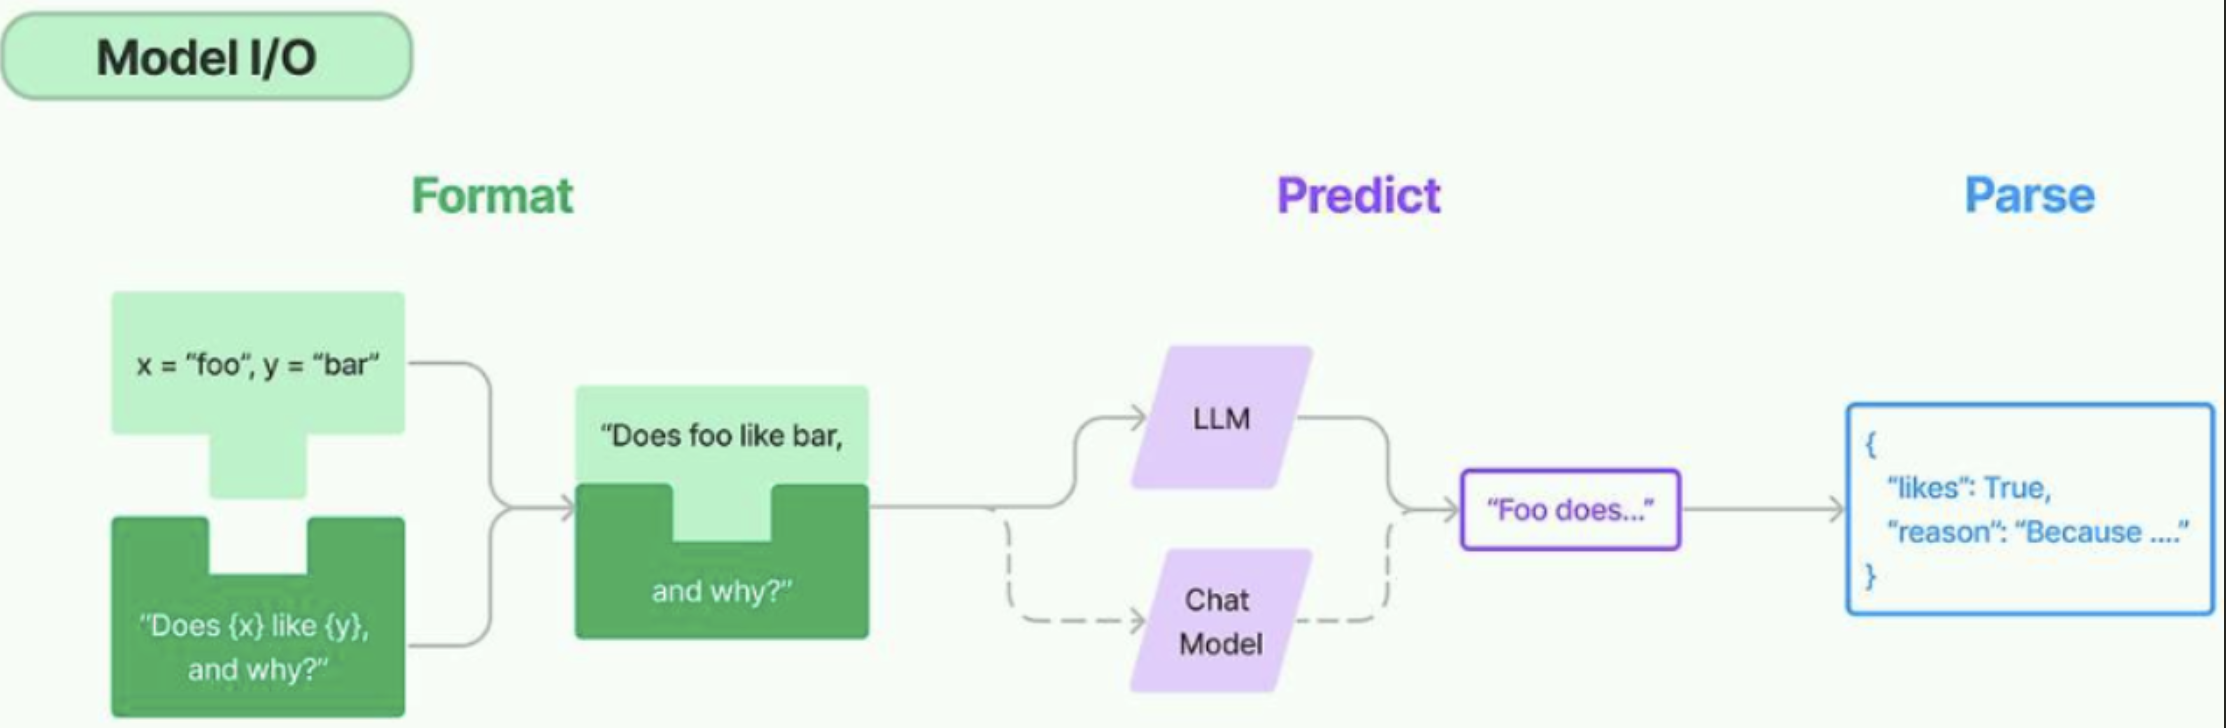

## GPT-5 이전 모델

### 창작용 (Creative Writing)

| 파라미터                | 값              | 설명                     |
| ------------------- | -------------- | ---------------------- |
| `temperature`       | 0.8~1.0        | 창의성과 다양성 높임            |
| `top_p`             | 0.8~0.95       | 확률 분포의 상위만 사용 (랜덤성 추가) |
| `frequency_penalty` | 0.5~1.0        | 같은 단어 반복 방지            |
| `presence_penalty`  | 0.5~1.0        | 새로운 주제 도입 유도           |
| `max_tokens`        | 넉넉히 (300~1000) | 길게 생성 가능               |


In [50]:
from langchain_openai import OpenAI

llm_creative = OpenAI(
    model="gpt-3.5-turbo-instruct", 
    temperature=0.9,               # 높을수록 더 창의적
    top_p=0.9,                     # nucleus sampling (0.8~0.95 권장)
    frequency_penalty=0.7,         # 반복 억제
    presence_penalty=0.6,          # 새로운 아이디어 유도
    max_tokens=500
)

In [51]:
prompt = "한국어로 사람들에게 힘을 주는 시를 하나 만들어줘."

response = llm_creative.invoke(prompt) 


In [52]:
print(response)


지치고 지칠 때면
너의 모든 생각이 어둠처럼 느껴질 수 있어

하지만 기억해, 넌 강하니까
오늘도 멈추지 말고 달려가자

내일의 빛을 바라보며
마음 속에 희망의 씨앗을 심어두고

힘든 날이 찾아와도 괜찮아
넌 너 자신에게 충분한 힘을 갖고 있어

잊지 말아줘, 넌 사랑받는 사람이야
주변에 뿌리는 따뜻한 마음들로 인해

모든 게 잘 될 거야, 믿어줘
네 안에서 가득한 힘이 세상을 밝혀줄 거야

계속해서 나아가자, 함께라면 어렵지 않아
우리 모두 함께 하나가 되어 이 세상을 밝혀주자.


### 정확한 답변용 (Fact-based)

| 파라미터                | 값             | 설명                    |
| ------------------- | ------------- | --------------------- |
| `temperature`       | 0.0~0.2       | 가장 높은 일관성, 정답형 응답     |
| `top_p`             | 1.0           | 확률 분포 전체 사용 (랜덤성 최소화) |
| `frequency_penalty` | 0.0           | 자연스러운 반복 허용           |
| `presence_penalty`  | 0.0           | 새로운 주제 제한             |
| `max_tokens`        | 적당히 (100~300) | 불필요한 장황함 방지           |


In [53]:
from langchain_openai import OpenAI

llm_precise = OpenAI(
    model="gpt-3.5-turbo-instruct",
    temperature=0.1,              # 거의 랜덤성 없음
    top_p=1.0,                    # 전체 분포 사용
    frequency_penalty=0.0,        # 사실 그대로 출력
    presence_penalty=0.0,
    max_tokens=300
)

In [54]:
response = llm_precise.invoke("지구에서 가장 깊은 바다는 어디야?")

In [55]:
print(response)



지구에서 가장 깊은 바다는 마리아나해구이다.


## GPT-5 모델 

### 창작용 (Creative Writing)

In [56]:
from langchain_openai import OpenAI

creative_llm = OpenAI(
    model="gpt-5-nano",             # 모델 선택
    verbosity="high",               # 표현력 풍부하게
    reasoning_effort="medium",      # 중간 수준의 추론
)

/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3639: UserWarning: WARNING! verbosity is not default parameter.
                verbosity was transferred to model_kwargs.
                Please confirm that verbosity is what you intended.
  if await self.run_code(code, result, async_=asy):
/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3639: UserWarning: WARNING! reasoning_effort is not default parameter.
                reasoning_effort was transferred to model_kwargs.
                Please confirm that reasoning_effort is what you intended.
  if await self.run_code(code, result, async_=asy):


In [57]:
prompt = "한국어로 사람들에게 힘을 주는 시를 하나 만들어줘."

response = llm_creative.invoke(prompt) 


In [59]:
print(response)



사람들이 어려운 길을 가고 있어도, 힘든 날도 이겨낼 수 있게
항상 함께하며 응원하는 너의 마음과 말 한마디면 충분해
네 곁에 내가 있어서 늘 지켜줄게, 그냥 손잡고 같이 걸어가
어떤 시련들도 함께라면 이겨낼 힘이 생기는 걸 알아

우리 모두 다른 삶을 살지만 우리 모두 사랑하고 싶은 마음을 가지고
자신감을 잃지 않고 더 크게 꿈꾸며 더 멋진 내일을 만들기를 바래
나의 작은 위로가 되길 바래 이 세상 어디에서든 항상 네 곁에서

흔들릴 때마다 나를 찾아준 그대여 여기에 나의 소중한 사람 
모든 게 어렵다 해도 기억해 내가 당신 옆에 있다는 걸 
나의 작은 위로가 되길 바래 이 세상 어디에서든 항상 네 곁에서 

이 긴 여정 끝엔 결국 좋은 일만 따르길 기도할게 그대와 함께였으면 


### 정확한 답변용 (Fact-based)

In [60]:
from langchain_openai import OpenAI

fact_llm = OpenAI(
    model="gpt-5-nano",
    verbosity="low",                # 불필요한 장식 최소화
    reasoning_effort="high",        # 논리성 강화
)

/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3639: UserWarning: WARNING! verbosity is not default parameter.
                verbosity was transferred to model_kwargs.
                Please confirm that verbosity is what you intended.
  if await self.run_code(code, result, async_=asy):
/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3639: UserWarning: WARNING! reasoning_effort is not default parameter.
                reasoning_effort was transferred to model_kwargs.
                Please confirm that reasoning_effort is what you intended.
  if await self.run_code(code, result, async_=asy):


In [61]:
response = llm_precise.invoke("지구에서 가장 깊은 바다는 어디야?")

In [63]:
print(response)



지구에서 가장 깊은 바다는 마리아나해구이다.
